In [21]:
pip install JSAnimation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
import numpy as np

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [24]:
# Perfect sensor
def sense(x):
    return x

In [25]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [ ]:
#CONTROL POLICY circle:
# def control(t, y):
#     ux = -sin(t)
#     uy = cos(t)
#     return array([ux, uy])

In [ ]:
#CONTROL POLICY line:
# def control(t, y):
#     ux = 1
#     uy = 1
#     return array([ux, uy])

In [6]:
# #CONTROL POLICY ellipse:
# def control(t, y):
#     ux = -4*cos(t)
#     uy = -2*sin(t)
#     return array([ux, uy])

In [26]:
# # #CONTROL POLICY rotated ellipse:
def control(t, y):
    ux = -2*sqrt(3)*sin(t)-cos(t)
    uy = sqrt(3)*cos(t)-2*sin(t)
    return array([ux, uy])

In [27]:
tf = 6.26
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions can vary based on what kind of trajectory we want


# x = array([3., 4.]) # For exercise 1
x = array([2*sqrt(3)+3, 4]) # For exercise 2


x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

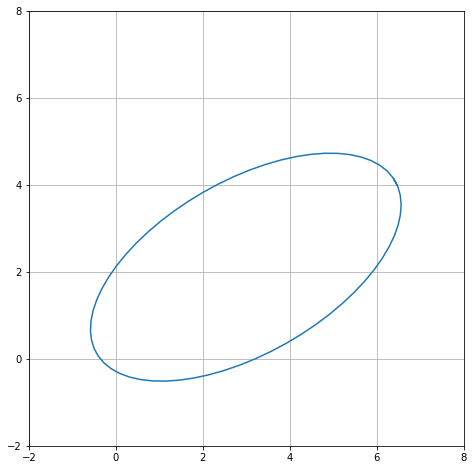

In [28]:
plt.rcParams["figure.figsize"] = (8, 8)
ax = plt.gca()
ax.set_xlim([-2, 8])
ax.set_ylim([-2, 8])
ax.set_aspect('equal', adjustable='box')

# plt.axhline(y = 2, color = 'r', linestyle = '-')
# x_plot = np.linspace(-2,8,1000)
# y_plot = 1/2*x_plot+1/2
# plt.plot(x_plot, y_plot, '-r')

grid()
plot(x_log[:,0], x_log[:,1])

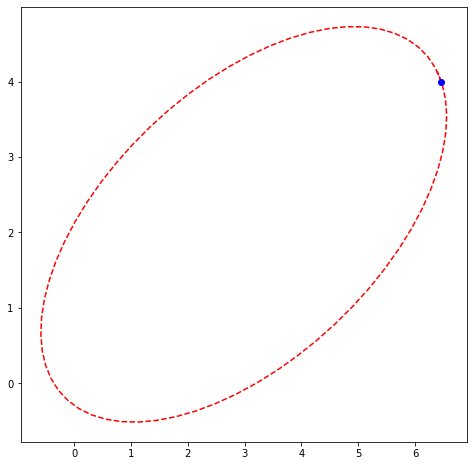

In [29]:
fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())